## Cats and Dogs

In [25]:
from PIL import Image                                              
import os, sys                       

path = 'D:/Onkar_D/Other/PetImages/Dog/'
dirs = os.listdir( path )                                       

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((299,299), Image.ANTIALIAS)
            imResize.save(f+'_D.png', 'png', quality=80)

resize()

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import merge
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils.data_utils import get_file
import random
import os
import cv2

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import os; import pandas as pd
from PIL import Image; import numpy as np
import cv2; import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import array_to_img, load_img, img_to_array

directory = 'D:/Onkar_D/Other/PetImages/Resize_Cat_and_Dog'

x = [os.path.abspath(os.path.join(directory, p)) for p in os.listdir(directory)]
x = pd.DataFrame(x)
x[0] = x[0].str.replace('\\','/')
#x[0] = x[0].apply(lambda x: "'" + str(x) + "'")


x_scratch_train = []
for imagePath in train:
    image = load_img(imagePath, target_size=(299,299))
    image
        
    
model = ResNet50(weights="imagenet", include_top=False, input_shape=(299,299, 3), pooling="avg")
feature_dog_cat = ResNet50_features_train(x[0], model)

In [20]:
import os; import pandas as pd
from PIL import Image; import numpy as np
import cv2; import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import array_to_img, load_img, img_to_array

directory = 'D:/Onkar_D/Other/PetImages/Resize_Cat_and_Dog'

x = [os.path.abspath(os.path.join(directory, p)) for p in os.listdir(directory)]
x = pd.DataFrame(x)
x[0] = x[0].str.replace('\\','/')
#x[0] = x[0].apply(lambda x: "'" + str(x) + "'")


def ResNet50_features_train(train, pre_model):
 
    x_scratch_train = []
    for imagePath in train:
        image = load_img(imagePath, target_size=(299,299))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        x_scratch_train.append(image)
        
    x_train = np.vstack(x_scratch_train)
    features_train = pre_model.predict(x_train)
    #features_flatten_train = features_train.reshape((features_train.shape[0], 2048))
    
model = ResNet50(weights="imagenet", include_top=False, input_shape=(299,299, 3), pooling="avg")
feature_dog_cat = ResNet50_features_train(x[0], model)
#feature_dog_cat.to_csv('Cat_feat.csv')

<ipython-input-20-1a862582774e>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  x[0] = x[0].str.replace('\\','/')


# STimage

In [1]:
import stlearn as st
st.settings.set_figure_params(dpi=300)
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sys; import scanpy as sc
from pathlib import Path
from typing import Optional, Union
from anndata import AnnData
import pandas as pd
from typing import Optional, Union
from anndata import AnnData
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import seaborn as sns
import numpy as np
import os
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import os
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_auc_score
from skimage.color import rgb2hed
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sys
from numpy import load
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import lime
from sklearn.preprocessing import MinMaxScaler
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.segmentation import watershed
import glob
import os
from tensorflow.keras.preprocessing import image as image_fun
from sklearn.preprocessing import OneHotEncoder
import skimage
from skimage.color import rgb2hed
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.measure import label
import scipy as sp
from scipy import ndimage as ndi
from skimage.morphology import area_opening
import math; import copy
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from tabgan.sampler import OriginalGenerator, GANGenerator
"""import geopandas as gpd
import pysal
from pysal.explore import esda
import pysal.lib as lps
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation
from libpysal.weights.contiguity import Queen
from libpysal import examples"""


def tiling(
        adata: AnnData,
        out_path: Union[Path, str] = "./tiling",
        library_id: str = None,
        crop_size: int = 40,
        target_size: int = 299,
        verbose: bool = False,
        copy: bool = False,
) -> Optional[AnnData]:
    

    if library_id is None:
        library_id = list(adata.uns["spatial"].keys())[0]

    # Check the exist of out_path
    if not os.path.isdir(out_path):
        os.mkdir(out_path)

    image = adata.uns["spatial"][library_id]["images"][adata.uns["spatial"]["use_quality"]]
    if image.dtype == np.float32 or image.dtype == np.float64:
        image = (image * 255).astype(np.uint8)
    img_pillow = Image.fromarray(image)
    tile_names = []

    with tqdm(
            total=len(adata),
            desc="Tiling image",
            bar_format="{l_bar}{bar} [ time left: {remaining} ]",
    ) as pbar:
        for imagerow, imagecol in zip(adata.obs["imagerow"], adata.obs["imagecol"]):
            imagerow_down = imagerow - crop_size / 2
            imagerow_up = imagerow + crop_size / 2
            imagecol_left = imagecol - crop_size / 2
            imagecol_right = imagecol + crop_size / 2
            tile = img_pillow.crop(
                (imagecol_left, imagerow_down, imagecol_right, imagerow_up)
            )
            # tile.thumbnail((target_size, target_size), Image.ANTIALIAS)
            tile = tile.resize((target_size, target_size))
            tile_name = library_id + "-" + str(imagecol) + "-" + str(imagerow) + "-" + str(crop_size)#np.arange(len(pd.Series(adata))+1).astype(str).str.zfill(4)+1 + "-" +
            out_tile = Path(out_path) / (tile_name + ".jpeg")
            tile_names.append(str(out_tile))
            if verbose:
                print(
                    "generate tile at location ({}, {})".format(
                        str(imagecol), str(imagerow)
                    )
                )
            tile.save(out_tile, "JPEG")

            pbar.update(1)

    adata.obs["tile_path"] = tile_names
    return adata if copy else None

In [2]:
os.chdir("C:/Users/ONKAR")
from STimage.stimage._utils import gene_plot

# 10X

In [2]:
BASE_PATH = Path("D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files")
TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)


SAMPLE = "block1"
Sample1 = st.Read10X(BASE_PATH / SAMPLE, 
                  library_id=SAMPLE, 
                  count_file="V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5",
                  quality="fulres",)
img = plt.imread(BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_1_image.tif", 0)
Sample1.uns["spatial"][SAMPLE]['images']["fulres"] = img


SAMPLE = "block2"
Sample2 = st.Read10X(BASE_PATH / SAMPLE, 
                  library_id=SAMPLE, 
                  count_file="V1_Breast_Cancer_Block_A_Section_2_filtered_feature_bc_matrix.h5",
                  quality="fulres",)
                  #source_image_path=BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_1_image.tif")
img = plt.imread(BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_2_image.tif", 0)
Sample2.uns["spatial"][SAMPLE]['images']["fulres"] = img

Sample1_un_norm, Sample2_un_norm = copy.copy(Sample1), copy.copy(Sample2)

for adata in [Sample1,Sample2,]:
    #Preprocessing
    st.pp.filter_genes(adata,min_cells=3)
    st.pp.log1p(adata)
    sc.pp.filter_cells(adata,min_counts=100)
    
    TILE_PATH_ = TILE_PATH / list(adata.uns["spatial"].keys())[0]
    TILE_PATH_.mkdir(parents=True, exist_ok=True)
    #tiling(adata, TILE_PATH_, crop_size=299)
    #st.pp.extract_feature(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Log transformation step is finished in adata.X
Log transformation step is finished in adata.X


In [ ]:
wd = "D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle"
pd.DataFrame(Sample1.obsm['X_tile_feature']).to_csv(wd+'Sample1_small_ResNet50.csv')
pd.DataFrame(Sample2.obsm['X_tile_feature']).to_csv(wd+'Sample2_small_ResNet50.csv')

# FFPE

In [3]:
BASE_PATH = Path("D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files")
TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)


SAMPLE = "FFPE_Breast_Cancer"
Sample3 = st.Read10X(BASE_PATH / SAMPLE, 
                  library_id=SAMPLE, 
                  count_file="Visium_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.h5",
                  quality="fulres",)
img = plt.imread(BASE_PATH / SAMPLE /"Visium_FFPE_Human_Breast_Cancer_image.tif", 0)
Sample3.uns["spatial"][SAMPLE]['images']["fulres"] = img


Sample3_un_norm = copy.copy(Sample3)
for adata in [Sample3,]:
     
    st.pp.filter_genes(adata,min_cells=3)
    sc.pp.filter_cells(adata,min_counts=100)
    st.pp.log1p(adata)
    
    TILE_PATH_ = TILE_PATH / list(adata.uns["spatial"].keys())[0]
    TILE_PATH_.mkdir(parents=True, exist_ok=True)
    #tiling(adata, TILE_PATH_, crop_size=299)
    #st.pp.extract_feature(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Log transformation step is finished in adata.X


In [ ]:
wd = "D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle"
pd.DataFrame(Sample3.obsm['X_tile_feature']).to_csv(wd+'Sample3_small_ResNet50.csv')

# 10X & FFPE

In [4]:
wd = "D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle/"
Sample1_resnet = pd.read_csv(wd+'Sample1_small_ResNet50.csv').iloc[:,1:] #Renset Features of Small 299 size tiles adata.obsm[X_tile_feature] --> saved as dataframe
Sample1_big_resnet = pd.read_csv(wd+'Sample1_big_ResNet50.csv').iloc[:,1:] # Renset Features of Small 1950 size tiles adata.obsm[X_tile_feature] --> saved as dataframe
X_train = pd.concat([Sample1_resnet, Sample1_big_resnet],axis=1)
X_train.columns = np.arange(len(X_train.columns))

Sample2_resnet = pd.read_csv(wd+'Sample2_small_ResNet50.csv').iloc[:,1:] #Renset Features of Small 299 size tiles adata.obsm[X_tile_feature] --> saved as dataframe
Sample2_big_resnet = pd.read_csv(wd+'Sample2_big_ResNet50.csv').iloc[:,1:]
X_test = pd.concat([Sample2_resnet, Sample2_big_resnet],axis=1)
X_test.columns = np.arange(len(X_test.columns))

Sample2_resnet_ffpe = pd.read_csv(wd+'Sample3_small_ResNet50.csv').iloc[:,1:] #Renset Features of Small 299 size tiles adata.obsm[X_tile_feature] --> saved as dataframe
Sample2_big_resnet_ffpe = pd.read_csv(wd+'Sample3_big_ResNet50.csv').iloc[:,1:]
X_test_ffpe = pd.concat([Sample2_resnet_ffpe, Sample2_big_resnet_ffpe],axis=1)
X_test_ffpe.columns = np.arange(len(X_test_ffpe.columns))

print(X_train.shape, X_test.shape, X_test_ffpe.shape)

(3798, 4096) (3986, 4096) (2518, 4096)


# Image Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_test_ffpe, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Spots')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

Spots1_hc = hc1.fit_predict(X_train)
Spots2_hc = hc2.fit_predict(X_test)
Spots3_hc = hc3.fit_predict(X_test_ffpe)

## Immune Genes

In [9]:
Sample2.to_df().reindex(Sample2.to_df().loc[:,Sample2.to_df().columns.str.startswith("CD")].mean().sort_values(ascending = False).index, axis=1)

CD74      CD24      CD63      CD81       CD9  \
AAACAACGAATAGTTC-1  3.951244  2.944439  2.995732  2.397895  1.945910   
AAACAAGTATCTCCCA-1  3.912023  1.945910  2.197225  1.609438  1.098612   
AAACAATCTACTAGCA-1  4.077538  2.890372  3.091043  3.091043  3.332205   
AAACACCAATAACTGC-1  4.343805  2.833213  3.401197  3.401197  3.401197   
AAACAGAGCGACTCCT-1  3.761200  2.197225  2.079442  1.945910  1.386294   
...                      ...       ...       ...       ...       ...   
TTGTTTCACATCCAGG-1  3.806663  2.708050  2.833213  2.708050  2.890372   
TTGTTTCATTAGTCTA-1  3.713572  2.833213  3.218876  2.995732  3.295837   
TTGTTTCCATACAACT-1  4.094345  1.945910  0.693147  2.564949  1.386294   
TTGTTTGTATTACACG-1  3.637586  3.610918  3.295837  2.833213  2.772589   
TTGTTTGTGTAAATTC-1  3.367296  2.890372  2.484907  2.302585  2.639057   

                       CD151      CD59      CDH1     CDC42      CD46  ...  \
AAACAACGAATAGTTC-1  1.098612  1.386294  1.791759  1.098612  1.386294  ...   
AAACAAGTATCTCCCA-1  1.098612  1.386294  0.693147  1.386294  1.609438  ...   
AAACAATCTACTAGCA-1  1.098612  2.302585  2.833213  1.791759  1.945910  ...   
AAACACCAATAACTGC-1  2.639057  2.197225  1.098612  1.386294  1.791759  ...   
AAACAGAGCGACTCCT-1  1.386294  2.564949  1.098612  1.098612  0.000000  ...   
...                      ...       ...       ...       ...       ...  ...   
TTGTTTCACATCCAGG-1  2.079442  1.609438  2.302585  1.791759  1.386294  ...   
TTGTTTCATTAGTCTA-1  2.197225  2.397895  2.708050  1.791759  1.791759  ...   
TTGTTTCCATACAACT-1  1.945910  1.386294  1.609438  1.386294  0.000000  ...   
TTGTTTGTATTACACG-1  2.302585  2.772589  1.609438  2.564949  2.484907  ...   
TTGTTTGTGTAAATTC-1  1.098612  0.693147  2.197225  0.693147  0.693147  ...   

                    CDKL2  CD81-AS1  CDK5R2  CDH7  CDHR2  CDH18  CD8B2  CDH22  \
AAACAACGAATAGTTC-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
AAACAAGTATCTCCCA-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
AAACAATCTACTAGCA-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
AAACACCAATAACTGC-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
AAACAGAGCGACTCCT-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
...                   ...       ...     ...   ...    ...    ...    ...    ...   
TTGTTTCACATCCAGG-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
TTGTTTCATTAGTCTA-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
TTGTTTCCATACAACT-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
TTGTTTGTATTACACG-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   
TTGTTTGTGTAAATTC-1    0.0       0.0     0.0   0.0    0.0    0.0    0.0    0.0   

                    CDHR4  CDH17  
AAACAACGAATAGTTC-1    0.0    0.0  
AAACAAGTATCTCCCA-1    0.0    0.0  
AAACAATCTACTAGCA-1    0.0    0.0  
AAACACCAATAACTGC-1    0.0    0.0  
AAACAGAGCGACTCCT-1    0.0    0.0  
...                   ...    ...  
TTGTTTCACATCCAGG-1    0.0    0.0  
TTGTTTCATTAGTCTA-1    0.0    0.0  
TTGTTTCCATACAACT-1    0.0    0.0  
TTGTTTGTATTACACG-1    0.0    0.0  
TTGTTTGTGTAAATTC-1    0.0    0.0  

[3986 rows x 220 columns]

## Train

In [ ]:
kf = StratifiedKFold(n_splits = 5)

scores = []; best_index = []
for i, j in kf.split(X_train, Y_1):
    x_train = X_train.iloc[i]
    y_train = Y_1.iloc[i]
    model = model_c.fit(x_train,y_train)
    predictions = model.predict(X_test)
    best_index.append(i)
    scores.append(roc_auc_score(predictions, test_Y_1))
    
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

clf = model_c.fit(X_train.iloc[best_index[argmax(scores)]], Y_1.iloc[best_index[argmax(scores)]])#model_c.fit(X_train, Y_1)#
pred = clf.predict(X_test)

In [80]:
#smote = SMOTE()
#x_smote, y_smote = smote.fit_resample(X_train, Y_1)
#clf = model_c.fit(X_train, Y_1)

new_train2, new_target2 = GANGenerator().generate_data_pipe(X_train.iloc[:,1:], Y_1, X_test.iloc[:,1:])
clf = model_c.fit(new_train2, new_target2)

Fitting CTGAN transformers for each column:   0%|          | 0/4096 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
clf = model_c.fit(X_train, Y_1)
pred = clf.predict(X_test)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [9]:
from sklearn.multioutput import MultiOutputClassifier; from sklearn.multioutput import MultiOutputRegressor; import lightgbm as lgb
import pandas as pd; import shap; import numpy as np; import joblib
from sklearn import preprocessing; from sklearn.preprocessing import LabelEncoder;
from sklearn import preprocessing; from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import roc_auc_score; from sklearn.model_selection import train_test_split; from sklearn.neural_network import MLPClassifier; from sklearn.neural_network import MLPRegressor

biomarker_list_1 = ["COX6C","CD74"]#['COX6C','TTLL12','PGM5','KRT5','SLITRK6', 'CPB1', "PABPC1", "GNAS", "HSP90AB1", "TFF3", "ATP1A1", "B2M", "FASN", "ESR1", "SPARC", "ACTG1", "HLA-B", "LINC00645", "MALAT1"]
biomarker_list_2 = ['COX6C','TTLL12', "PABPC1", "GNAS", "HSP90AB1", "TFF3", "ATP1A1", "B2M", "FASN", "SPARC"]

#

#lgb.LGBMRegressor()
model_c = MLPClassifier(max_iter=10000)
model_r = MLPRegressor(max_iter=10000)
    
MinMax_scaler_y_1 = preprocessing.MinMaxScaler(feature_range =(0, 1))
MinMax_scaler_y_2 = preprocessing.MinMaxScaler(feature_range =(0, 1))

Y_1 = Sample1.to_df()[biomarker_list_1]
Y_1 = MinMax_scaler_y_1.fit_transform(Y_1) 
Y_1 = pd.DataFrame(data=Y_1)
#Y_1 = Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1]))
#Y_1 = Y_1.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))"""

test_Y_1 = Sample2.to_df()[biomarker_list_1]
test_Y_1 = MinMax_scaler_y_2.fit_transform(test_Y_1)
test_Y_1 = pd.DataFrame(data=test_Y_1)
#test_Y_1 = test_Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1]))
#test_Y_1 = test_Y_1.apply(lambda x: pd.qcut(x, 2,duplicates='drop',labels=False))
test_Y_1 = test_Y_1.fillna(0)

#Y_1 = Y_1.astype('int64')
#test_Y_1 = test_Y_1.astype('int64')

In [2]:
import joblib
#model_r = MultiOutputRegressor(model_r).fit(X_train, Y_1)
#joblib.dump(model_c, wd+'Temp-2.pkl')
wd = "D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle/"
model_c = joblib.load(wd+'Temp-2.pkl')

In [ ]:
# Classifier
clf = MultiOutputClassifier(model_c).fit(X_train, Y_1)
pred = clf.predict(X_test)
joblib.dump(clf, wd+'New_model_clf_biomarker_10X.pkl')

In [6]:
#from sklearn.externals import joblib
import joblib
wd = 'D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle/'
model_c = joblib.load(wd+'New_model_clf_biomarker_FFPE.pkl')
pred = model_c.predict(X_test_ffpe)

# Regression

In [12]:
#del Train
#del Test

Train = pd.concat([X_train, Reg_train], axis=1)
Test = pd.concat([X_test_ffpe, Reg_test], axis=1)

reg = MultiOutputRegressor(model_r).fit(Train, Sample1.to_df()[biomarker_list_1].values)
pred2 = reg.predict(Test)
joblib.dump(reg, wd+'New_model_reg_biomarker_FFPE.pkl')

['D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle/New_model_reg_biomarker_FFPE.pkl']

In [9]:
Reg_train = pd.DataFrame()
Reg_train = Y_1
Reg_train["Spots1_hc"] = Spots1_hc


Reg_test = pd.DataFrame()
Reg_test = pd.DataFrame(pred)
Reg_test["Spots2_hc"] = Spots3_hc
Reg_test

0  1  2  3  4  5  6  7  8  9  Spots2_hc
0     1  0  1  1  1  1  0  1  1  1          2
1     0  0  1  1  0  0  0  1  0  0          0
2     0  0  1  1  1  0  0  1  0  0          0
3     0  0  0  0  0  0  0  0  0  0          0
4     0  0  1  0  0  0  0  0  0  0          0
...  .. .. .. .. .. .. .. .. .. ..        ...
2513  0  0  0  1  0  1  0  0  0  0          0
2514  0  0  0  1  0  1  0  0  0  0          0
2515  0  0  0  0  0  1  0  0  0  0          1
2516  0  0  0  1  0  1  0  0  0  0          0
2517  0  0  1  0  0  0  1  1  0  0          0

[2518 rows x 11 columns]

In [10]:
reg_pred = []
for i in range(0,len(pred[0])):
    Train = pd.concat([X_train, Reg_train.iloc[:,[i,len(pred[0])]]], axis=1)
    Test = pd.concat([X_test_ffpe, Reg_test.iloc[:,[i,len(pred[0])]]], axis=1)
    reg = model_r.fit(Train, Sample1.to_df()[biomarker_list_1[i]])
    pred2 = reg.predict(Test)
    reg_pred.append(pred2)
pd.DataFrame(reg_pred).T.to_csv(wd+"Regression_FFPE.csv", index = False)

In [4]:
wd = 'D:/Onkar_D/UQ/Project_Spt.Transcriptomics/Output_files/pickle/'
pred2_ffpe = pd.read_csv(wd+'Regression_FFPE.csv')
pred2_10x = pd.read_csv(wd+'Regression_10X.csv')

## AUROC & F1

In [14]:
AUROC = []
for i in range(len(pred[0])):
    score = roc_auc_score(pred[:,i], test_Y_1.iloc[:,i])
    AUROC.append(score)    
AUROC

[0.6212166562904076,
 0.9026939978270051,
 0.5621079705010104,
 0.7150976070528967,
 0.7232261872572678,
 0.7163786580752239,
 0.7591535440886856,
 0.7669128628934754,
 0.753440350499174,
 0.6982934598539909,
 0.5754511855330517,
 0.6394023361695775,
 0.7272251952217548,
 0.7335405364677516,
 0.5834531719189556,
 0.6600672853044769,
 0.6755734006076003,
 0.7127151290774465,
 0.5575314999062995]

In [ ]:
roc = pd.DataFrame(index = biomarker_list_1)
roc["AUROC"] = AUROC
#roc = roc.set_index('Gene')
ax = roc.sort_values("AUROC").plot.barh()
fig = ax.get_figure()
fig.savefig(wd+'AUROC-10X_New-Model.jpeg')

In [ ]:
F1 = []
for i in range(len(pred[0])):
    score = f1_score(pred[:,i], test_Y_1.iloc[:,i], average='binary')
    F1.append(score)    
F1

In [ ]:
roc = pd.DataFrame(index = biomarker_list_1)
roc["F1"] = F1
ax = roc.sort_values("F1").plot.barh()
fig = ax.get_figure()
fig.savefig(wd+'F1-10X_New-Model.jpeg')

## CORR

In [14]:
from scipy import stats
Corr = []
for i in range(len(pred2.iloc[0])):
    r2 = stats.pearsonr(pred2.iloc[:,i], Sample3.to_df()[biomarker_list_1].iloc[:,i])
    Corr.append(r2[0])    
Corr

[0.2698785120326976,
 0.13814216051853456,
 -0.0496572752922559,
 0.2696200730046784,
 0.19286067223855707,
 0.13466548160871955,
 0.20467916427636207,
 0.20894443081412695,
 0.29881882742299803,
 0.015230236333522499]

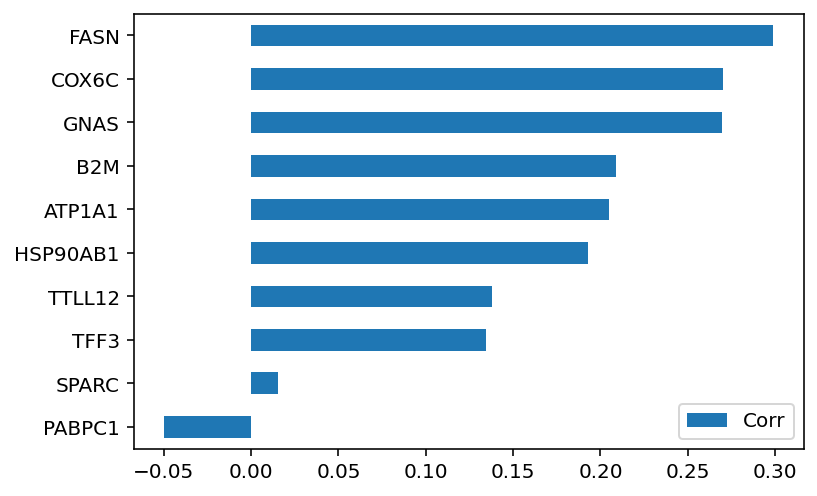

In [15]:
cor = pd.DataFrame(index = biomarker_list_1)
cor["Corr"] = Corr
ax = cor.sort_values("Corr").plot.barh()
fig = ax.get_figure()
fig.savefig(wd+'Corr_bar-FFPE_New-Model.jpeg')

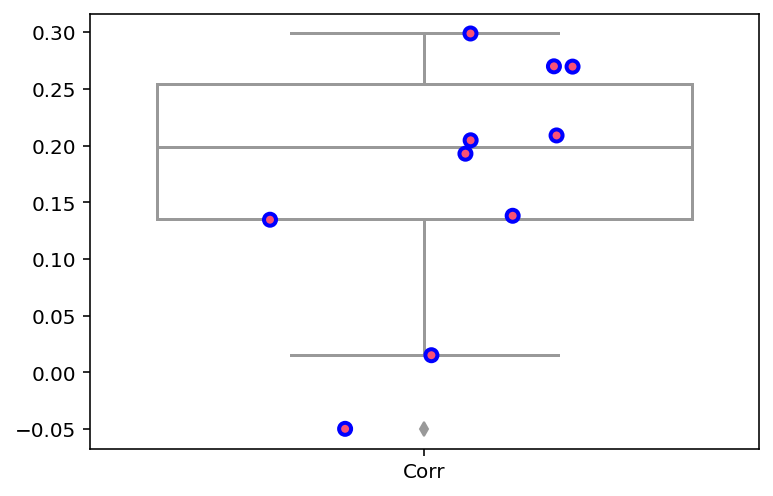

In [16]:
sns_plot = sns.boxplot(data=cor, color = "white")
sns.stripplot(data=cor, jitter=0.25, dodge=True, palette=sns.husl_palette(1, l=0.6, s=.95), size=6, linewidth=2, edgecolor='blue')
sns_plot.figure.savefig(wd+"Corr_box-FFPE_New-Model.jpeg")

## MORAN CORR

In [ ]:
Sample2.obsm["gpd"] = gpd.GeoDataFrame(Sample2.obs,
                                                 geometry=gpd.points_from_xy(
                                                     Sample2.obs.imagecol, 
                                                     Sample2.obs.imagerow))
w = Queen.from_dataframe(Sample2.obsm["gpd"])

Sample2.obsm["gpd"]["gc_{}".format(gene)] = x
Sample2.obsm["gpd"]["pred_{}".format(gene)] = pred2

moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# Visualisation GE

# FASN -- FFPE

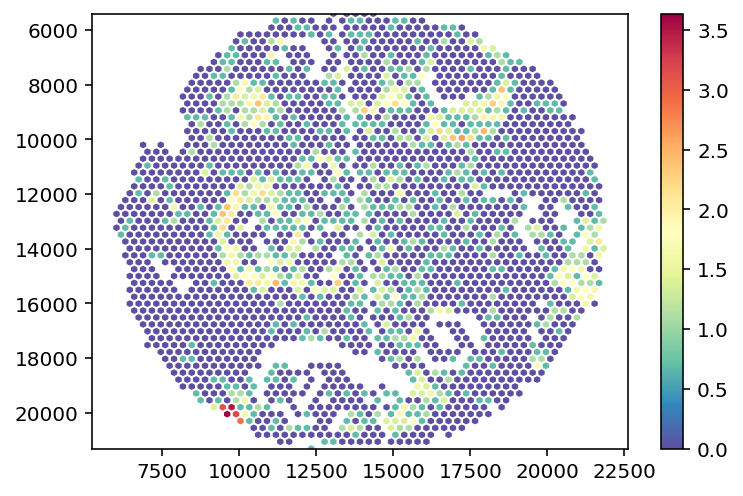

In [7]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample3.obs["imagerow"] 
y = Sample3.obs["imagecol"] 

c = #Sample3.to_df()["TFF3"]#test_Y_1#

fig1 = plt.gcf()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#plt.draw()
#fig1.savefig(wd+'PABPC1_true-FFPE.jpeg')

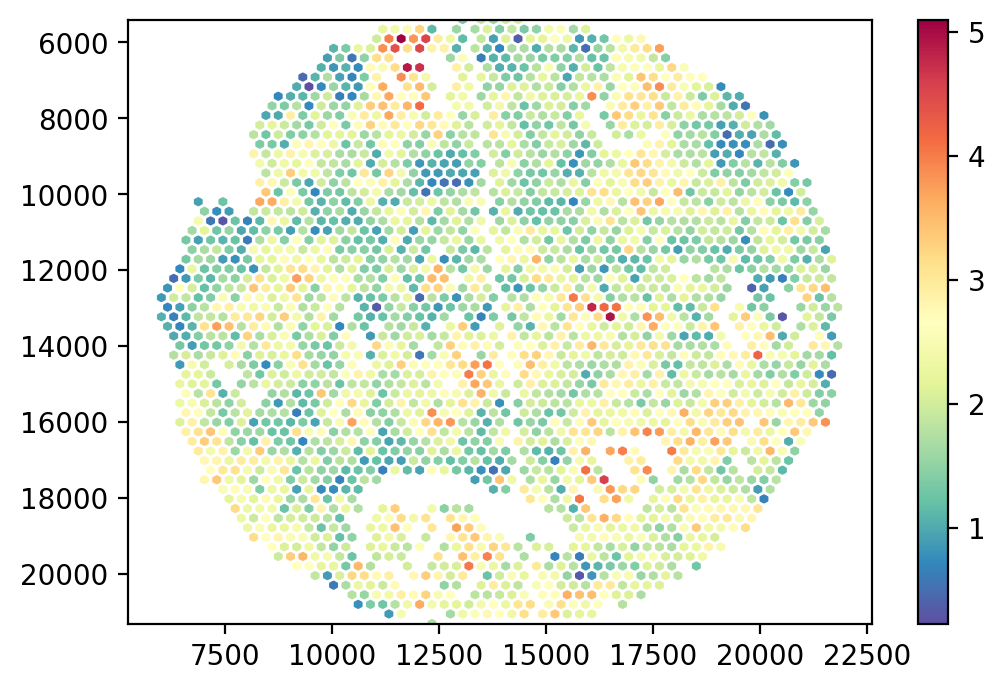

In [14]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample3.obs["imagerow"] 
y = Sample3.obs["imagecol"] 

c = pred2.iloc[:,2]

fig1 = plt.gcf()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#plt.draw()
#fig1.savefig(wd+'PABPC1_true_class-FFPE.jpeg')

### Predicted

In [ ]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample3.obs["imagerow"] 
y = Sample3.obs["imagecol"] 

c = test_Y_1.iloc[:,1]

fig1 = plt.gcf()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#plt.draw()
#fig1.savefig(wd+'PABPC1_pred-FFPE.jpeg')

# Spatial Autocorrelation  p-value = 0.01

In [ ]:
def Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd):
    Sample_set2.obsm["gpd"] = gpd.GeoDataFrame(Sample_set2.obs,
                                                 geometry=gpd.points_from_xy(
                                                     Sample_set2.obs.imagecol, 
                                                     Sample_set2.obs.imagerow))

    MinMax_scaler_y_1 = preprocessing.MinMaxScaler(feature_range =(0, 1))
    MinMax_scaler_y_2 = preprocessing.MinMaxScaler(feature_range =(0, 1))

    Y_1 = Sample_set1.to_df()[biomarker_list_1]
    Y_1 = MinMax_scaler_y_1.fit_transform(Y_1) 
    Y_1 = pd.DataFrame(data=Y_1)
    Y_1 = Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1])); Y_1 = Y_1.astype('int64')


    test_Y_1 = Sample_set2.to_df()[biomarker_list_1]
    test_Y_1 = MinMax_scaler_y_2.fit_transform(test_Y_1)
    test_Y_1 = pd.DataFrame(data=test_Y_1)
    test_Y_1 = test_Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1]))
    test_Y_1 = test_Y_1.fillna(0); test_Y_1 = test_Y_1.astype('int64')


    w = Queen.from_dataframe(Sample_set2.obsm["gpd"])

    y = Model.predict(test_X)

    x = test_Y_1[[0]].values
    Sample_set2.obsm["gpd"]["gc_{}".format(gene)] = x
    Sample_set2.obsm["gpd"]["pred_{}".format(gene)] = y
    tissue_image = Sample_set2.uns["spatial"]["FFPE_Breast_Cancer"]["images"]["fulres"]
    
    
    moran = Moran(y,w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc = Moran_Local(y, w)
    moran_loc_bv = Moran_Local_BV(y, x, w)

    fig, ax = plt.subplots(figsize=(5,5))
    moran_plot = moran_scatterplot(moran_bv, ax=ax)
    ax.set_xlabel('prediction of gene {}'.format(gene))
    ax.set_ylabel('Spatial lag of ground truth of gene {}'.format(gene))
    plt.tight_layout()
    plt.show()


    def plot_choropleth(gdf, 
                        attribute_1,
                        attribute_2,
                        bg_img,
                        alpha=0.5,
                        scheme='Quantiles', 
                        cmap='YlGnBu', 
                        legend=True):

        fig, axs = plt.subplots(2,1, figsize=(5, 8),
                                subplot_kw={'adjustable':'datalim'})

        # Choropleth for attribute_1
        gdf.plot(column=attribute_1, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[0], alpha=alpha, markersize=2)

        axs[0].imshow(bg_img)
        axs[0].set_title('choropleth plot for {}'.format(attribute_1), y=0.8)
        axs[0].set_axis_off()

        # Choropleth for attribute_2
        gdf.plot(column=attribute_2, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[1], alpha=alpha, markersize=2)

        axs[1].imshow(bg_img)
        axs[1].set_title('choropleth plot for {}'.format(attribute_2), y=0.8)
        axs[1].set_axis_off()

        plt.tight_layout()

        return fig, ax

    choropleth_plot = plot_choropleth(Sample_set2.obsm["gpd"], "gc_{}".format(gene),"pred_{}".format(gene),tissue_image)
    plt.show()

    lisa_cluster(moran_loc_bv, Sample_set2.obsm["gpd"], p=0.01, 
                 figsize = (9,9), markersize=12, **{"alpha":0.8})
    lisa_plot = plt.imshow(Sample_set2.uns["spatial"]["FFPE_Breast_Cancer"]["images"]["fulres"])
    plt.show()
    return moran_plot, choropleth_plot, lisa_plot



gene = "FASN"
Sample_set1 = Sample1
Sample_set2 = Sample3
wd = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/'
test_X = X_test_ffpe
Model = clf
a,b,c = Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd)

# Spatial Autocorrelation p-val = 0.5

In [ ]:
import joblib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal
from pysal.explore import esda
import pysal.lib as lps
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import os


def Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd):
    Sample_set2.obsm["gpd"] = gpd.GeoDataFrame(Sample_set2.obs,
                                                 geometry=gpd.points_from_xy(
                                                     Sample_set2.obs.imagecol, 
                                                     Sample_set2.obs.imagerow))

    MinMax_scaler_y_1 = preprocessing.MinMaxScaler(feature_range =(0, 1))
    MinMax_scaler_y_2 = preprocessing.MinMaxScaler(feature_range =(0, 1))

    Y_1 = Sample_set1.to_df()[biomarker_list_1]
    Y_1 = MinMax_scaler_y_1.fit_transform(Y_1) 
    Y_1 = pd.DataFrame(data=Y_1)
    Y_1 = Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1])); Y_1 = Y_1.astype('int64')


    test_Y_1 = Sample_set2.to_df()[biomarker_list_1]
    test_Y_1 = MinMax_scaler_y_2.fit_transform(test_Y_1)
    test_Y_1 = pd.DataFrame(data=test_Y_1)
    test_Y_1 = test_Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1]))
    test_Y_1 = test_Y_1.fillna(0); test_Y_1 = test_Y_1.astype('int64')


    w = Queen.from_dataframe(Sample_set2.obsm["gpd"])

    y = Model.predict(test_X)

    x = test_Y_1[[0]].values
    Sample_set2.obsm["gpd"]["gc_{}".format(gene)] = x
    Sample_set2.obsm["gpd"]["pred_{}".format(gene)] = y
    tissue_image = Sample_set2.uns["spatial"]["FFPE_Breast_Cancer"]["images"]["fulres"]
    
    
    moran = Moran(y,w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc = Moran_Local(y, w)
    moran_loc_bv = Moran_Local_BV(y, x, w)

    fig, ax = plt.subplots(figsize=(5,5))
    moran_plot = moran_scatterplot(moran_bv, ax=ax)
    ax.set_xlabel('prediction of gene {}'.format(gene))
    ax.set_ylabel('Spatial lag of ground truth of gene {}'.format(gene))
    plt.tight_layout()
    plt.show()


    def plot_choropleth(gdf, 
                        attribute_1,
                        attribute_2,
                        bg_img,
                        alpha=0.5,
                        scheme='Quantiles', 
                        cmap='YlGnBu', 
                        legend=True):

        fig, axs = plt.subplots(2,1, figsize=(5, 8),
                                subplot_kw={'adjustable':'datalim'})

        # Choropleth for attribute_1
        gdf.plot(column=attribute_1, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[0], alpha=alpha, markersize=2)

        axs[0].imshow(bg_img)
        axs[0].set_title('choropleth plot for {}'.format(attribute_1), y=0.8)
        axs[0].set_axis_off()

        # Choropleth for attribute_2
        gdf.plot(column=attribute_2, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[1], alpha=alpha, markersize=2)

        axs[1].imshow(bg_img)
        axs[1].set_title('choropleth plot for {}'.format(attribute_2), y=0.8)
        axs[1].set_axis_off()

        plt.tight_layout()

        return fig, ax

    choropleth_plot = plot_choropleth(Sample_set2.obsm["gpd"], "gc_{}".format(gene),"pred_{}".format(gene),tissue_image)
    plt.show()

    lisa_cluster(moran_loc_bv, Sample_set2.obsm["gpd"], p=0.5, 
                 figsize = (9,9), markersize=12, **{"alpha":0.8})
    lisa_plot = plt.imshow(Sample_set2.uns["spatial"]["FFPE_Breast_Cancer"]["images"]["fulres"])
    plt.show()
    return moran_plot, choropleth_plot, lisa_plot



gene = "FASN"
Sample_set1 = Sample1
Sample_set2 = Sample3
wd = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/'
test_X = X_test_ffpe
Model = clf
a,b,c = Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd)

In [ ]:
Sample3.obsm["gpd"]

# Visualisation GE

# COX6C 10X

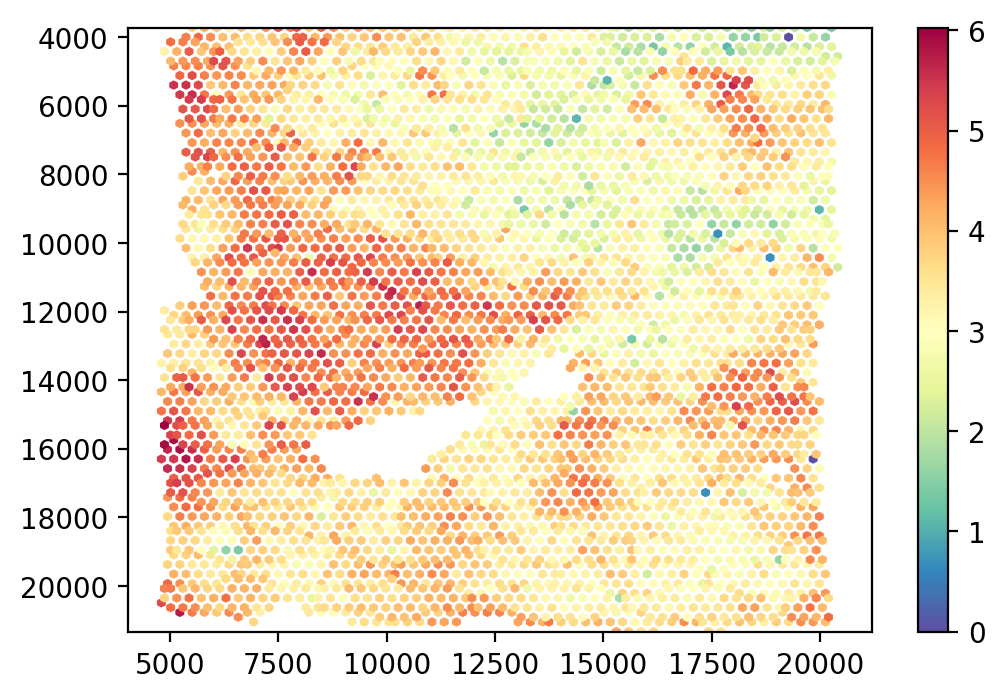

In [10]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample2.obs["imagerow"] 
y = Sample2.obs["imagecol"] 

c = Sample2.to_df()["CD74"]

fig1 = plt.gcf()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#plt.draw()
#fig1.savefig(wd+'PABPC1_true-FFPE.jpeg')

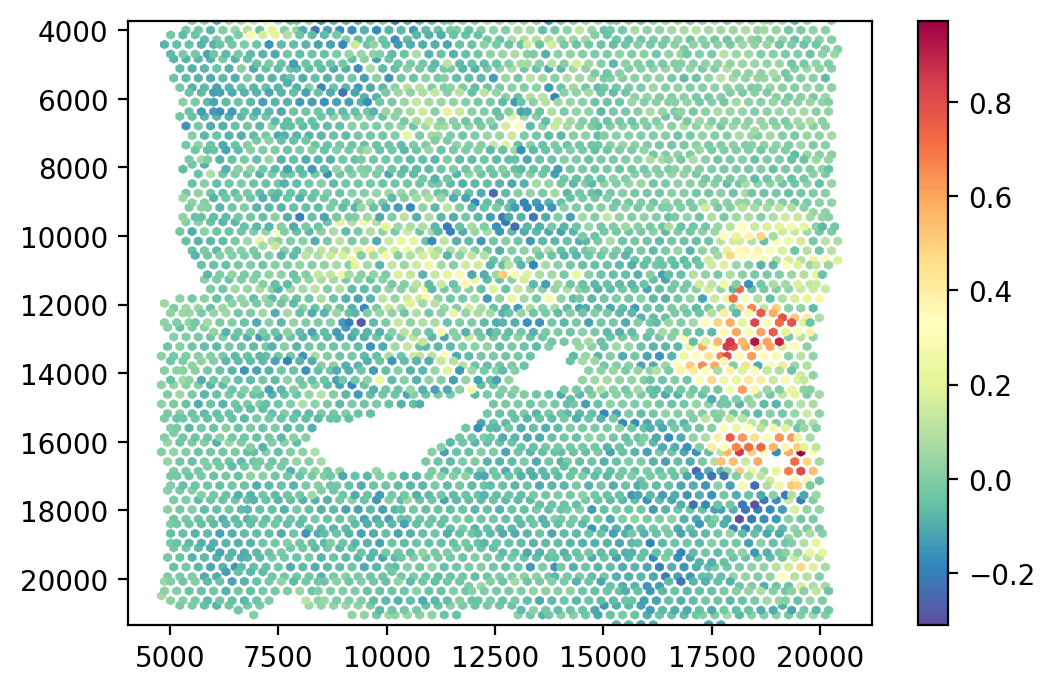

In [30]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample2.obs["imagerow"] 
y = Sample2.obs["imagecol"] 

c = pred

fig1 = plt.gcf()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#plt.draw()
#fig1.savefig(wd+'PABPC1_true-FFPE.jpeg')

In [31]:
from scipy import stats
r2 = stats.pearsonr(pred, Sample2.to_df()["CPB1"])[0]
r2

0.19166950239182162

In [9]:
from sklearn.metrics import f1_score
f1_score(pred, test_Y_1)

0.6191155492154067

### Predicted

In [ ]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample2.obs["imagerow"] 
y = Sample2.obs["imagecol"] 

c = pred[:,1]

fig1 = plt.gcf()
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 
#plt.draw()
#fig1.savefig(wd+'PABPC1_true-FFPE.jpeg')

# Spatial Autocorrelation p-value 0.01

In [ ]:
import joblib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal
from pysal.explore import esda
import pysal.lib as lps
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import os


def Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd):
    Sample_set2.obsm["gpd"] = gpd.GeoDataFrame(Sample_set2.obs,
                                                 geometry=gpd.points_from_xy(
                                                     Sample_set2.obs.imagecol, 
                                                     Sample_set2.obs.imagerow))

    MinMax_scaler_y_1 = preprocessing.MinMaxScaler(feature_range =(0, 1))
    MinMax_scaler_y_2 = preprocessing.MinMaxScaler(feature_range =(0, 1))

    Y_1 = Sample_set1.to_df()[biomarker_list_1]
    Y_1 = MinMax_scaler_y_1.fit_transform(Y_1) 
    Y_1 = pd.DataFrame(data=Y_1)
    Y_1 = Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1])); Y_1 = Y_1.astype('int64')


    test_Y_1 = Sample_set2.to_df()[biomarker_list_1]
    test_Y_1 = MinMax_scaler_y_2.fit_transform(test_Y_1)
    test_Y_1 = pd.DataFrame(data=test_Y_1)
    test_Y_1 = test_Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1]))
    test_Y_1 = test_Y_1.fillna(0); test_Y_1 = test_Y_1.astype('int64')


    w = Queen.from_dataframe(Sample_set2.obsm["gpd"])

    y = Model.predict(test_X)

    x = test_Y_1[[0]].values
    Sample_set2.obsm["gpd"]["gc_{}".format(gene)] = x
    Sample_set2.obsm["gpd"]["pred_{}".format(gene)] = y
    tissue_image = Sample_set2.uns["spatial"]["block2"]["images"]["fulres"]
    
    
    moran = Moran(y,w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc = Moran_Local(y, w)
    moran_loc_bv = Moran_Local_BV(y, x, w)

    fig, ax = plt.subplots(figsize=(5,5))
    moran_plot = moran_scatterplot(moran_bv, ax=ax)
    ax.set_xlabel('prediction of gene {}'.format(gene))
    ax.set_ylabel('Spatial lag of ground truth of gene {}'.format(gene))
    plt.tight_layout()
    plt.show()


    def plot_choropleth(gdf, 
                        attribute_1,
                        attribute_2,
                        bg_img,
                        alpha=0.5,
                        scheme='Quantiles', 
                        cmap='YlGnBu', 
                        legend=True):

        fig, axs = plt.subplots(2,1, figsize=(5, 8),
                                subplot_kw={'adjustable':'datalim'})

        # Choropleth for attribute_1
        gdf.plot(column=attribute_1, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[0], alpha=alpha, markersize=2)

        axs[0].imshow(bg_img)
        axs[0].set_title('choropleth plot for {}'.format(attribute_1), y=0.8)
        axs[0].set_axis_off()

        # Choropleth for attribute_2
        gdf.plot(column=attribute_2, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[1], alpha=alpha, markersize=2)

        axs[1].imshow(bg_img)
        axs[1].set_title('choropleth plot for {}'.format(attribute_2), y=0.8)
        axs[1].set_axis_off()

        plt.tight_layout()

        return fig, ax

    choropleth_plot = plot_choropleth(Sample_set2.obsm["gpd"], "gc_{}".format(gene),"pred_{}".format(gene),tissue_image)
    plt.show()

    lisa_cluster(moran_loc_bv, Sample_set2.obsm["gpd"], p=0.01, 
                 figsize = (9,9), markersize=12, **{"alpha":0.8})
    lisa_plot = plt.imshow(Sample_set2.uns["spatial"]["block2"]["images"]["fulres"])
    plt.show()
    return moran_plot, choropleth_plot, lisa_plot



gene = "COX6C"
Sample_set1 = Sample1
Sample_set2 = Sample2
wd = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/'
test_X = X_test
Model = clf
a,b,c = Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd)

# Spatial Autocorrelation p-value 0.5

In [ ]:
import joblib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal
from pysal.explore import esda
import pysal.lib as lps
from esda.moran import Moran, Moran_Local, Moran_BV, Moran_Local_BV
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import os


def Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd):
    Sample_set2.obsm["gpd"] = gpd.GeoDataFrame(Sample_set2.obs,
                                                 geometry=gpd.points_from_xy(
                                                     Sample_set2.obs.imagecol, 
                                                     Sample_set2.obs.imagerow))

    MinMax_scaler_y_1 = preprocessing.MinMaxScaler(feature_range =(0, 1))
    MinMax_scaler_y_2 = preprocessing.MinMaxScaler(feature_range =(0, 1))

    Y_1 = Sample_set1.to_df()[biomarker_list_1]
    Y_1 = MinMax_scaler_y_1.fit_transform(Y_1) 
    Y_1 = pd.DataFrame(data=Y_1)
    Y_1 = Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1])); Y_1 = Y_1.astype('int64')


    test_Y_1 = Sample_set2.to_df()[biomarker_list_1]
    test_Y_1 = MinMax_scaler_y_2.fit_transform(test_Y_1)
    test_Y_1 = pd.DataFrame(data=test_Y_1)
    test_Y_1 = test_Y_1.apply(lambda x: pd.cut(x, bins=[-0.01, 0.5, 1.01], labels = [0, 1]))
    test_Y_1 = test_Y_1.fillna(0); test_Y_1 = test_Y_1.astype('int64')


    w = Queen.from_dataframe(Sample_set2.obsm["gpd"])

    y = Model.predict(test_X)

    x = test_Y_1[[0]].values
    Sample_set2.obsm["gpd"]["gc_{}".format(gene)] = x
    Sample_set2.obsm["gpd"]["pred_{}".format(gene)] = y
    tissue_image = Sample_set2.uns["spatial"]["block2"]["images"]["fulres"]
    
    
    moran = Moran(y,w)
    moran_bv = Moran_BV(y, x, w)
    moran_loc = Moran_Local(y, w)
    moran_loc_bv = Moran_Local_BV(y, x, w)

    fig, ax = plt.subplots(figsize=(5,5))
    moran_plot = moran_scatterplot(moran_bv, ax=ax)
    ax.set_xlabel('prediction of gene {}'.format(gene))
    ax.set_ylabel('Spatial lag of ground truth of gene {}'.format(gene))
    plt.tight_layout()
    plt.show()


    def plot_choropleth(gdf, 
                        attribute_1,
                        attribute_2,
                        bg_img,
                        alpha=0.5,
                        scheme='Quantiles', 
                        cmap='YlGnBu', 
                        legend=True):

        fig, axs = plt.subplots(2,1, figsize=(5, 8),
                                subplot_kw={'adjustable':'datalim'})

        # Choropleth for attribute_1
        gdf.plot(column=attribute_1, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[0], alpha=alpha, markersize=2)

        axs[0].imshow(bg_img)
        axs[0].set_title('choropleth plot for {}'.format(attribute_1), y=0.8)
        axs[0].set_axis_off()

        # Choropleth for attribute_2
        gdf.plot(column=attribute_2, scheme=scheme, cmap=cmap,
                 legend=legend, legend_kwds={'loc': 'upper left',
                                             'bbox_to_anchor': (0.92, 0.8)},
                 ax=axs[1], alpha=alpha, markersize=2)

        axs[1].imshow(bg_img)
        axs[1].set_title('choropleth plot for {}'.format(attribute_2), y=0.8)
        axs[1].set_axis_off()

        plt.tight_layout()

        return fig, ax

    choropleth_plot = plot_choropleth(Sample_set2.obsm["gpd"], "gc_{}".format(gene),"pred_{}".format(gene),tissue_image)
    plt.show()

    lisa_cluster(moran_loc_bv, Sample_set2.obsm["gpd"], p=0.5, 
                 figsize = (9,9), markersize=12, **{"alpha":0.8})
    lisa_plot = plt.imshow(Sample_set2.uns["spatial"]["block2"]["images"]["fulres"])
    plt.show()
    return moran_plot, choropleth_plot, lisa_plot



gene = "COX6C"
Sample_set1 = Sample1
Sample_set2 = Sample2
wd = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/'
test_X = X_test
Model = clf
a,b,c = Spatial_AutoCorr(Sample_set1, Sample_set2, Model, test_X, gene, wd)

# LIME difficult to build because Classification-model takes 2 images as Input whereas LIME take only one

In [119]:
import cv2
gene_list = ["COX6C", "CD74"]
resnet_model1 = ResNet50(weights="imagenet", include_top=False, input_shape=(598, 299, 3), pooling="avg")
resnet_model2 = ResNet50(weights="imagenet", include_top=False, input_shape=(299, 299, 3), pooling="avg")


def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image_fun.load_img(img_path, target_size=(299, 299))
        x = image_fun.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        out.append(x)
    return np.vstack(out)

def model_predict_gene(gene):
    i = gene_list.index(gene)


    def combine_model_predict(tile1):
        height, width = tile1[0].shape[:2]
        height_cutoff = height // 2
        img1 = tile1[0][:height_cutoff, :].astype(np.uint8).reshape(1,299,299,3)
        img2 = tile1[0][height_cutoff:, :].astype(np.uint8).reshape(1,299,299,3)
        feature1 = resnet_model2.predict(img1)
        feature2 = resnet_model2.predict(img2)
        feature = np.concatenate((feature1, feature2), axis=1)
        prediction = model_c.predict_proba(feature)
        return prediction[i]
    return combine_model_predict

def watershed_segment(image):
    annotation_hed = rgb2hed(image)
    annotation_h = annotation_hed[:,:,0]
    annotation_h *= 255.0 / np.percentile(annotation_h, q=80)
    thresh = skimage.filters.threshold_otsu(annotation_h)
    im_fgnd_mask = sp.ndimage.morphology.binary_fill_holes(
        annotation_h < thresh
    )
    distance = ndi.distance_transform_edt(im_fgnd_mask)
    coords = peak_local_max(distance, footprint=np.ones((5, 5)), labels=im_fgnd_mask)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(annotation_h, markers, mask=im_fgnd_mask)
    im_nuclei_seg_mask = area_opening(labels, area_threshold=64).astype(np.int)
    map_dic = dict(zip(np.unique(im_nuclei_seg_mask), np.arange(len(np.unique(im_nuclei_seg_mask)))))
    im_nuclei_seg_mask = np.vectorize(map_dic.get)(im_nuclei_seg_mask)
    return im_nuclei_seg_mask

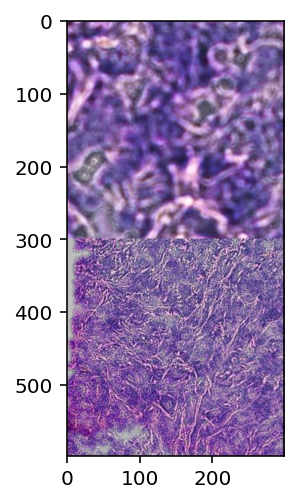

In [123]:
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])
img = cv2.vconcat([image1[0], image2[0]]).astype(np.uint8)
plt.imshow(img)

  0%|          | 0/100 [00:00<?, ?it/s]

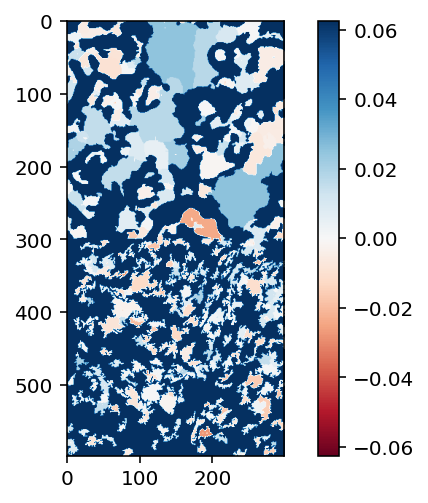

In [120]:
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])
img = cv2.vconcat([image1[0], image2[0]]).astype(np.uint8)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img.astype('double'), model_predict_gene("COX6C"), segmentation_fn = watershed_segment, top_labels=2, num_samples=100)#, image2.astype('double')
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatm ap.max(), vmax = heatmap.max())
plt.colorbar()

  0%|          | 0/100 [00:00<?, ?it/s]

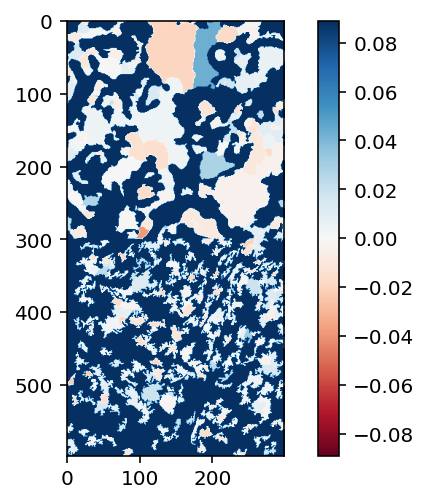

In [122]:
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])
img = cv2.vconcat([image1[0], image2[0]]).astype(np.uint8)

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img.astype('double'), model_predict_gene("CD74"), segmentation_fn = watershed_segment, top_labels=2, num_samples=100)#, image2.astype('double')
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# LIME 2 img

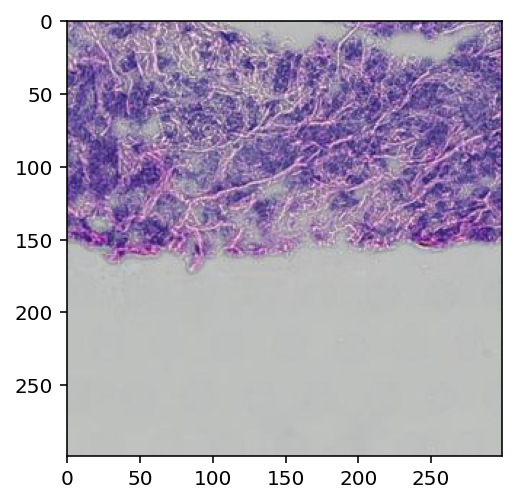

In [27]:
plt.imshow(Image.open('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-10258-21071-1950.jpeg'))

In [6]:
import cv2
gene_list = ["COX6C", "CD74"]
resnet_model1 = ResNet50(weights="imagenet", include_top=False, input_shape=(299, 299, 3), pooling="avg")


def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image_fun.load_img(img_path, target_size=(299, 299))
        x = image_fun.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        out.append(x)
    return np.vstack(out)

def model_predict_gene(gene, tile2):
    i = gene_list.index(gene)

    def combine_model_predict(tile1):
        feature1 = resnet_model1.predict(tile1)
        feature2 = resnet_model1.predict(tile2)
        feature = np.concatenate((feature1, feature2), axis=1)
        prediction = model_c.predict_proba(feature)
        return prediction[i]
    return combine_model_predict

def watershed_segment(image):
    annotation_hed = rgb2hed(image)
    annotation_h = annotation_hed[:,:,0]
    annotation_h *= 255.0 / np.percentile(annotation_h, q=80)
    thresh = skimage.filters.threshold_otsu(annotation_h)
    im_fgnd_mask = sp.ndimage.morphology.binary_fill_holes(
        annotation_h < thresh
    )
    distance = ndi.distance_transform_edt(im_fgnd_mask)
    coords = peak_local_max(distance, footprint=np.ones((5, 5)), labels=im_fgnd_mask)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(annotation_h, markers, mask=im_fgnd_mask)
    im_nuclei_seg_mask = area_opening(labels, area_threshold=64).astype(np.int)
    map_dic = dict(zip(np.unique(im_nuclei_seg_mask), np.arange(len(np.unique(im_nuclei_seg_mask)))))
    im_nuclei_seg_mask = np.vectorize(map_dic.get)(im_nuclei_seg_mask)
    return im_nuclei_seg_mask

  0%|          | 0/100 [00:00<?, ?it/s]

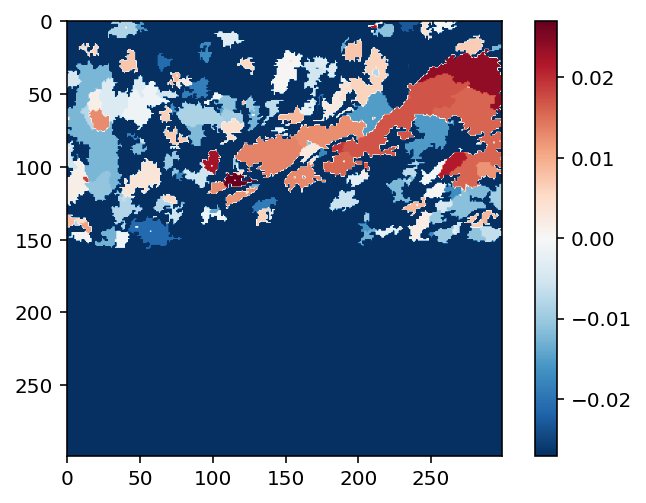

In [33]:
"""image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5091-14880-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5091-14880-1950.jpeg')])
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])"""


image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-10258-21071-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-10258-21071-1950.jpeg')])



explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image2[0].astype('double'), classifier_fn = model_predict_gene("CD74", image1.astype('double')), segmentation_fn = watershed_segment, top_labels=2, num_samples=100)#, image2.astype('double')
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[1]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu_r', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

  0%|          | 0/100 [00:00<?, ?it/s]

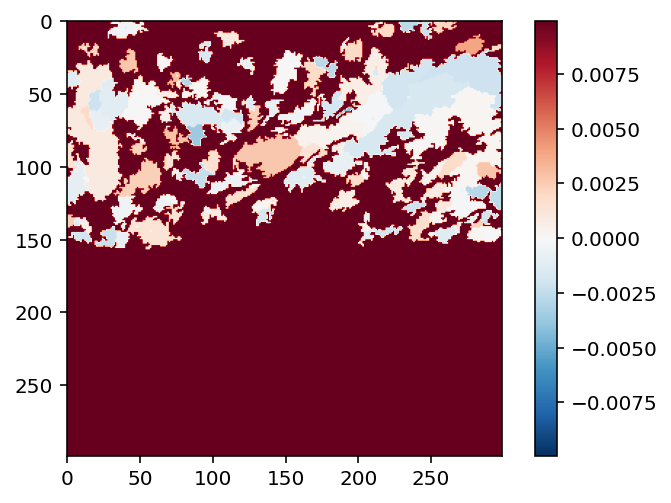

In [34]:
"""image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5091-14880-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5091-14880-1950.jpeg')])
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])
"""


image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-10258-21071-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-10258-21071-1950.jpeg')])



explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image2[0].astype('double'), classifier_fn = model_predict_gene("COX6C", image1.astype('double')), segmentation_fn = watershed_segment, top_labels=2, num_samples=100)#, image2.astype('double')
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[1]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu_r', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


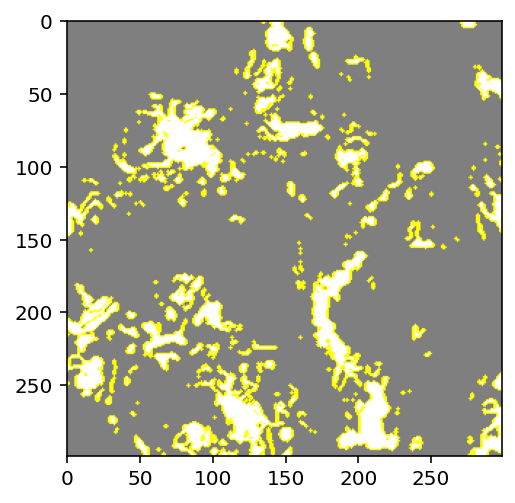

In [26]:
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-4953-15118-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-4953-15118-1950.jpeg')])
explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(image1[0].astype('double'), image2[0].astype('double'), classifier_fn = model_predict_gene("CD74", image2.astype('double')), top_labels=2, hide_color=0, num_samples=100)
temp, mask = explanation.get_image_and_mask(0, positive_only=True, num_features=50, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image1[0].astype('double'), image2[0].astype('double'), classifier_fn = model_predict_gene("COX6C"), segmentation_fn = watershed_segment, top_labels=2, num_samples=100)#, image2.astype('double')
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

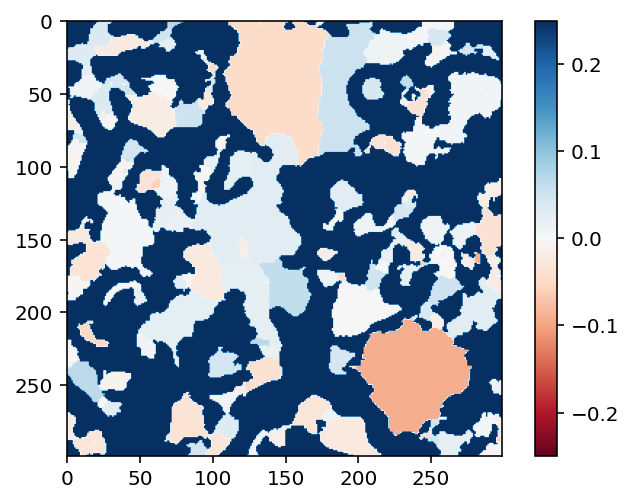

In [5]:
image1 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\tiles\\block2\\block2-5759-19395-299.jpeg')])
image2 = transform_img_fn([os.path.join('D:\\Onkar_D\\UQ\\Project_Spt.Transcriptomics\\Output_files\\big_tiles\\block2\\block2-5759-19395-1950.jpeg')])

explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image1[0].astype('double'), image2[0].astype('double'), classifier_fn = model_predict_gene("CD74", image2.astype('double')), segmentation_fn = watershed_segment, top_labels=2, num_samples=100)#, image2.astype('double')
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[0]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# Spot Clustering

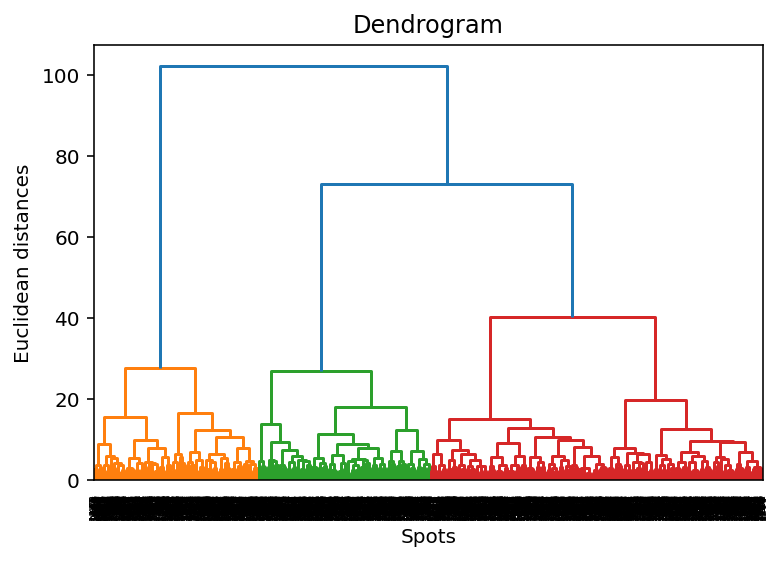

In [10]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(Sample3.to_df()[biomarker_list_2], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Spots')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering

hc_ffpe_true = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc_10x_true = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
ffpe_true = hc_ffpe_true.fit_predict(Sample3.to_df()[biomarker_list_2])
g10x_true = hc_10x_true.fit_predict(Sample2.to_df()[biomarker_list_1])


hc_ffpe_pred = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc_10x_pred = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
ffpe_pred = hc_ffpe_pred.fit_predict(pred2_ffpe)
g10x_pred = hc_10x_pred.fit_predict(pred2_10x)

# Spot Cluster Visualization

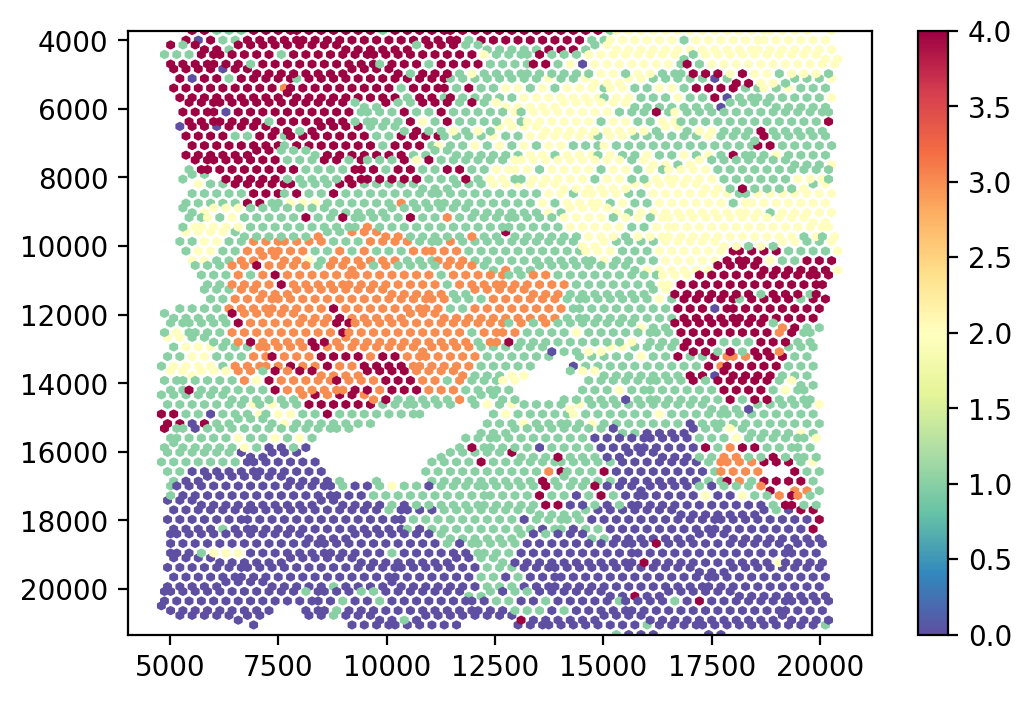

In [30]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample2.obs["imagerow"] 
y = Sample2.obs["imagecol"] 
c = g10x_true         #Sample3.to_df()["TFF3"]#test_Y_1#
fig1 = plt.gcf()
#plt.rcParams['figure.dpi'] = 100; plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

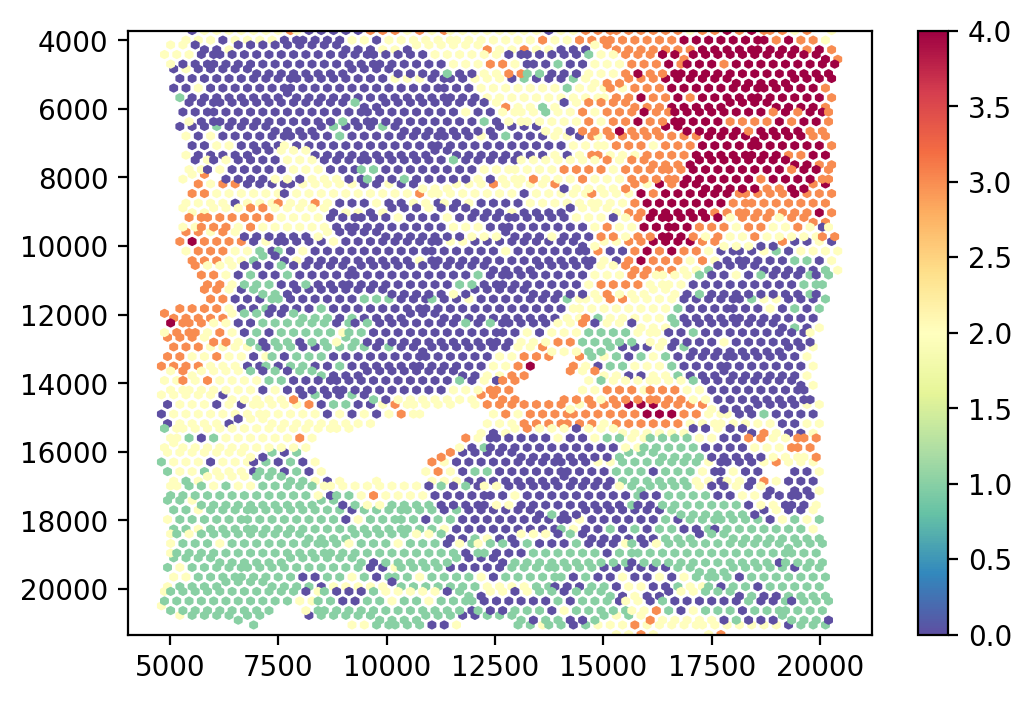

In [31]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

"""indices_one = ffpe_pred == 2
indices_zero = ffpe_pred == 1
ffpe_pred[indices_one] = 1 
ffpe_pred[indices_zero] = 2 """

x = Sample2.obs["imagerow"] 
y = Sample2.obs["imagecol"] 
c = g10x_pred         #Sample3.to_df()["TFF3"]#test_Y_1#
fig1 = plt.gcf()
#plt.rcParams['figure.dpi'] = 100; plt.rcParams['savefig.dpi'] = 400
plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

# Ignore below sections please... it's just practice codes

In [ ]:
Model_classifier = clf

resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(299, 299, 3), pooling="avg")
gene_list = ["COX6C"]

    
def model_predict_gene(gene):
    i = gene_list.index(gene)
    def combine_model_predict(tile):
        feature = resnet_model.predict(tile)
        feature = feature.reshape((10, 2048))
        prediction = Model_classifier.predict_proba(feature)
        return prediction[i]
    return combine_model_predict


def pred_label(tile):
    feature = resnet_model.predict(tile)
    feature = feature.reshape((1, 2048))
    prediction = Model_classifier.predict_proba(feature)
    return prediction

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image_fun.load_img(img_path, target_size=(299, 299))
        x = image_fun.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        out.append(x)
    return np.vstack(out)

def watershed_segment(image):
    annotation_hed = rgb2hed(image)
    annotation_h = annotation_hed[:,:,0]
    annotation_h *= 255.0 / np.percentile(annotation_h, q=80)
    thresh = skimage.filters.threshold_otsu(annotation_h)
    im_fgnd_mask = sp.ndimage.morphology.binary_fill_holes(
        annotation_h < thresh
    )
    distance = ndi.distance_transform_edt(im_fgnd_mask)
    coords = peak_local_max(distance, footprint=np.ones((5, 5)), labels=im_fgnd_mask)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(annotation_h, markers, mask=im_fgnd_mask)
    im_nuclei_seg_mask = area_opening(labels, area_threshold=64).astype(np.int)
    map_dic = dict(zip(np.unique(im_nuclei_seg_mask), np.arange(len(np.unique(im_nuclei_seg_mask)))))
    im_nuclei_seg_mask = np.vectorize(map_dic.get)(im_nuclei_seg_mask)
    return im_nuclei_seg_mask

In [ ]:
plt.imshow(Image.open('D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/tiles/block2/block2-7831-11564-299.jpeg'))

In [ ]:
images = transform_img_fn([os.path.join('D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/tiles/block2/block2-7831-11564-299.jpeg')])
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0].astype('double'), model_predict_gene("COX6C"), segmentation_fn= watershed_segment, top_labels=2, num_samples=100)
dict_heatmap = dict(explanation.local_exp[explanation.top_labels[1]])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -1, vmax = 1)
plt.colorbar()

In [ ]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample4["imagerow"].sort_index() 
y = Sample4["imagecol"].sort_index()

c = ge_2["LINC00645"].sort_index()

plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

In [ ]:
from matplotlib import cm as cm
import numpy as np
from matplotlib import pyplot as plt

x = Sample2.obs["imagerow"] 
y = Sample2.obs["imagecol"] 

c = Sample2.to_df()["TTLL12"]

plt.hexbin(y,x, C=c, cmap=cm.Spectral_r, gridsize=110)
plt.ylim(max(x), min(x)) 
plt.colorbar()
plt.show() 

## Visualisation

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

wd = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/Output_Spots_Image/'
wd1 = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/'

def Visualise(image, Sample1):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    Spot_vals0=Sample1.values

    x = Spot_vals0[:,4].astype('int64')
    y = Spot_vals0[:,5].astype('int64')
    box = (x,y)
    numpy_array = np.array(box)
    transpose = numpy_array.T
    box = transpose.tolist()

    for i in range(0,len(box)):
        image=cv2.circle(image, tuple(box[i]), 75,(255,0,0), -1)

    cv2.imwrite(wd+"Trial-2.png",image)

image = cv2.imread(wd1+"block2/V1_Breast_Cancer_Block_A_Section_2_image.tif") 
Visualise(image, Sample3)

# Arrange Dataframe

In [ ]:
"""def get_nearest_index(self, quary_spots, candidates, k_nn, leaf_size):
    tree = KDTree(candidates, leaf_size=leaf_size)
    _, indices = tree.query(quary_spots, k=k_nn)
    return indices.ravel()[1:]

candidates = self.adata.obs[['imagecol', 'imagerow']]
quary_spots = np.array(candidates.loc[obs_temp,:]).reshape(1, -1)
nearest_index = self.get_nearest_index(quary_spots, candidates, k_nn=7, leaf_size=self.adata.n_obs//2)

from sklearn.neighbors import KDTree
tree = KDTree(Sample2.obs[["imagerow","imagecol"]])              
dist, ind = tree.query(Sample3[["imagerow","imagecol"]], k=7)"""

"""wd = 'D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/'
pd.DataFrame(Sample1.obsm['X_tile_feature']).to_csv(wd+'Sample1_big.csv')
pd.DataFrame(Sample2.obsm['X_tile_feature']).to_csv(wd+'Sample2_big.csv')"""

In [ ]:
list1 = []
start, end = Sample1.obs["array_row"].min(), Sample1.obs["array_row"].max()
for num in range(start, end + 1):
    if num % 2 == 0:
        list1.append(num)
        
list2 = []
start, end = Sample1.obs["array_col"].min(), Sample1.obs["array_col"].max()
for num in range(start, end + 1):
    if num % 2 == 1:
        list2.append(num)
list2 = list2[1::2]

list3 = []
start, end = Sample2.obs["array_row"].min(), Sample2.obs["array_row"].max()
for num in range(start, end + 1):
    if num % 2 == 0:
        list3.append(num)
        
list4 = []
start, end = Sample2.obs["array_col"].min(), Sample2.obs["array_col"].max()
for num in range(start, end + 1):
    if num % 2 == 1:
        list4.append(num)
list4 = list4[1::2]

Sample3 = copy.copy(Sample1.obs.sort_values(["array_row"]))
Sample3 = Sample3[~Sample3['array_row'].isin(list1)]
Sample3 = Sample3[~Sample3['array_col'].isin(list2)].sort_index()

Sample4 = copy.copy(Sample2.obs.sort_values(["array_row"]))
Sample4 = Sample4[~Sample4['array_row'].isin(list3)]
Sample4 = Sample4[~Sample4['array_col'].isin(list4)].sort_index()

Sample1_resnet = pd.read_csv('D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/Sample1_1000.csv')
Sample1_resnet.index = Sample1.obs.index
Sample2_resnet = pd.read_csv('D:/onkar/Projects/Project_Spt.Transcriptomics/Output_files/Sample2_1000.csv')
Sample2_resnet.index = Sample2.obs.index

Sample1_resnet = Sample1_resnet[Sample1_resnet.index.isin(Sample3.index)]
Sample1_resnet = Sample1_resnet.drop(["Unnamed: 0"], axis=1)
Sample2_resnet = Sample2_resnet[Sample2_resnet.index.isin(Sample4.index)]
Sample2_resnet = Sample2_resnet.drop(["Unnamed: 0"], axis=1)

ge_1 = Sample1.to_df()[Sample1.to_df().index.isin(Sample3.index)].sort_index()
ge_2 = Sample2.to_df()[Sample2.to_df().index.isin(Sample4.index)].sort_index()

In [ ]:
Y_1_0 = Y_1[Y_1[0]==0]
Y_1_0_reg = ge_1.iloc[Y_1_0.index][biomarker_list_1]
X_1_0 = Sample1_resnet.iloc[Y_1_0.index]

Y_1_1 = Y_1[Y_1[0]==1]
Y_1_1_reg = ge_1.iloc[Y_1_1.index][biomarker_list_1]
X_1_1 = Sample1_resnet.iloc[Y_1_1.index]

clf_1 = model_c.fit(Sample1_resnet, Y_1)#MultiOutputClassifier(model).fit(X_1, Y_1) #joblib.dump(clf, wd+'ResNet50-LGBM_biomarker_gene.pkl')
reg_0 = model_r.fit(X_1_0, Y_1_0_reg)
reg_1 = model_r.fit(X_1_1, Y_1_1_reg)

GE = ge_2.reset_index(drop=True)
GE['class'] = clf_1.predict(Sample2_resnet)

GE_0 = GE[GE['class']==0]
GE_1 = GE[GE['class']==1]

test_X_1_0 = Sample2_resnet.iloc[GE_0.index]
test_X_1_1 = Sample2_resnet.iloc[GE_1.index]

r1 = reg_0.predict(test_X_1_0)
r2 = reg_1.predict(test_X_1_1)

Reg1 = pd.DataFrame(index = GE[GE['class']==0].index)
Reg1["r"] = r1
Reg2 = pd.DataFrame(index = GE[GE['class']==1].index)
Reg2["r"] = r2

Reg = pd.concat([Reg1,Reg2])
Reg = Reg.sort_index()
Reg.index = Sample4.index